<ipython-input-4-e0554f6230c1>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6']] = df[['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6']].astype(int)
<ipython-input-4-e0554f6230c1>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_numbers.index, y=top_10_numbers.values, palette="viridis")


Top 10 Most Frequently Drawn Numbers:
2     1940
9     1914
3     1899
8     1870
4     1869
1     1858
7     1829
6     1807
5     1795
19     996
Name: count, dtype: int64


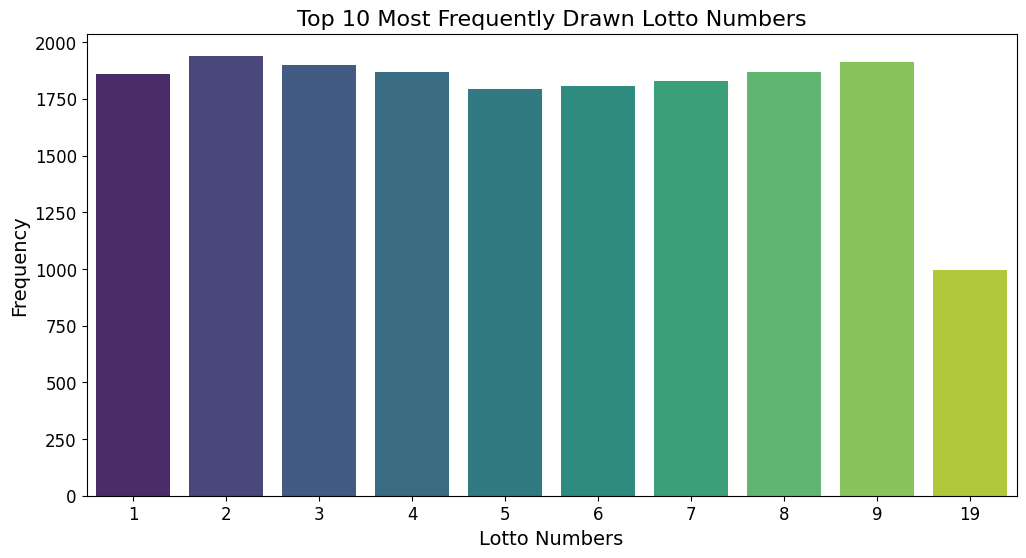


Predicted Most Likely Combination (based on frequency): [2, 9, 3, 8, 4, 1]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('pcso_data.csv')

# Drop rows where COMBINATIONS is null
df = df.dropna(subset=['COMBINATIONS'])

# Ensure the COMBINATIONS column contains only valid strings
df['COMBINATIONS'] = df['COMBINATIONS'].astype(str)

# Split COMBINATIONS into individual numbers
df[['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6']] = df['COMBINATIONS'].str.split('-', expand=True)

# Convert split numbers to integers, handling invalid data gracefully
for col in ['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where any of the split numbers are null after conversion
df = df.dropna(subset=['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6'])

# Ensure numeric columns are integers
df[['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6']] = df[['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6']].astype(int)

# Flatten all numbers into a single series for frequency analysis
all_numbers = pd.concat([df['Num1'], df['Num2'], df['Num3'], df['Num4'], df['Num5'], df['Num6']])

# Frequency count of each number
number_counts = all_numbers.value_counts().sort_index()

# Display the top 10 most frequently drawn numbers
top_10_numbers = number_counts.nlargest(10)
print("Top 10 Most Frequently Drawn Numbers:")
print(top_10_numbers)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_numbers.index, y=top_10_numbers.values, palette="viridis")
plt.title("Top 10 Most Frequently Drawn Lotto Numbers", fontsize=16)
plt.xlabel("Lotto Numbers", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Predict the most frequent combinations (e.g., top 6 numbers)
predicted_combination = top_10_numbers.index[:6].tolist()
print("\nPredicted Most Likely Combination (based on frequency):", predicted_combination)


Frequency of numbers drawn in November (highest to lowest):
4     162
3     157
1     157
5     156
2     147
7     147
9     133
8     133
6     132
38     91
15     90
30     87
21     85
17     83
41     83
14     82
27     81
16     81
40     78
10     78
19     77
28     77
23     76
20     74
32     73
36     73
25     73
34     72
26     72
12     72
35     72
33     71
22     71
29     70
13     70
0      68
24     67
42     66
37     66
31     63
39     63
45     61
18     61
44     59
43     59
11     58
47     40
48     39
46     34
49     32
54     29
52     28
50     24
55     24
51     23
53     21
58     15
56      5
57      3
Name: count, dtype: int64


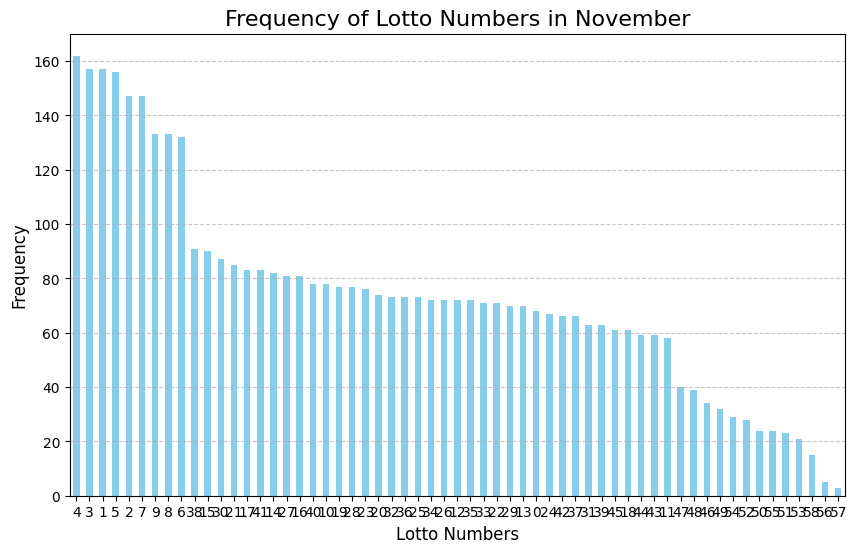

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert DRAW DATE to datetime format
df['DRAW DATE'] = pd.to_datetime(df['DRAW DATE'], format='%m/%d/%Y', errors='coerce')

# Filter for November draws
november_draws = df[df['DRAW DATE'].dt.month == 11]

# Combine all numbers into a single series
november_numbers = pd.concat([
    november_draws['Num1'],
    november_draws['Num2'],
    november_draws['Num3'],
    november_draws['Num4'],
    november_draws['Num5'],
    november_draws['Num6']
])

# Calculate frequency of each number, sorted in descending order
number_frequency = november_numbers.value_counts(ascending=False)

# Display the frequency
print("Frequency of numbers drawn in November (highest to lowest):")
print(number_frequency)

# Visualize the frequency
plt.figure(figsize=(10, 6))
number_frequency.plot(kind='bar', color='skyblue')
plt.title("Frequency of Lotto Numbers in November", fontsize=16)
plt.xlabel("Lotto Numbers", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convert DRAW DATE to datetime format
df['DRAW DATE'] = pd.to_datetime(df['DRAW DATE'], format='%m/%d/%Y', errors='coerce')

# Drop rows with missing values in DRAW DATE or number columns
df = df.dropna(subset=['DRAW DATE', 'Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6'])

# Extract features from DRAW DATE
df['Month'] = df['DRAW DATE'].dt.month
df['Day'] = df['DRAW DATE'].dt.day
df['DayOfWeek'] = df['DRAW DATE'].dt.dayofweek

# Features and targets
features = df[['Month', 'Day', 'DayOfWeek']]
targets = df[['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6']]

# Train a separate model for each number position
models = {}
predictions = []
for i in range(1, 7):  # For Num1 to Num6
    target = targets[f'Num{i}']
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Train Random Forest model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    models[f'Num{i}'] = model

    # Evaluate the model
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Model accuracy for Num{i}: {acc:.2f}")

    # Predict for today's date
    today = pd.DataFrame({'Month': [pd.Timestamp.now().month],
                          'Day': [pd.Timestamp.now().day],
                          'DayOfWeek': [pd.Timestamp.now().dayofweek]})
    prediction = model.predict(today)[0]
    predictions.append(prediction)

# Display the predicted numbers for today's date
print("Predicted most probable numbers for today's date:")
print(predictions)


Model accuracy for Num1: 0.02
Model accuracy for Num2: 0.02
Model accuracy for Num3: 0.03
Model accuracy for Num4: 0.02
Model accuracy for Num5: 0.02
Model accuracy for Num6: 0.03
Predicted most probable numbers for today's date:
[32, 10, 37, 29, 40, 6]


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import os

# Filepath for the dataset
DATA_FILE = "lotto_data.csv"

# Load or initialize the dataset
if os.path.exists(DATA_FILE):
    df = pd.read_csv(DATA_FILE)
    df['DRAW DATE'] = pd.to_datetime(df['DRAW DATE'], format='%m/%d/%Y', errors='coerce')
else:
    # Create an empty dataset if file doesn't exist
    columns = ['DRAW DATE', 'Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6']
    df = pd.DataFrame(columns=columns)

def add_new_results(draw_date, numbers):
    """Add new winning numbers to the dataset."""
    global df
    new_row = {
        'DRAW DATE': pd.to_datetime(draw_date, format='%m/%d/%Y', errors='coerce'),
        'Num1': numbers[0],
        'Num2': numbers[1],
        'Num3': numbers[2],
        'Num4': numbers[3],
        'Num5': numbers[4],
        'Num6': numbers[5],
    }
    new_row_df = pd.DataFrame([new_row])
    df = pd.concat([df, new_row_df], ignore_index=True)
    df.to_csv(DATA_FILE, index=False)  # Save to file

def predict_next_day():
    """Train the model and predict the next day's numbers."""
    global df

    # Drop rows with missing values
    df = df.dropna(subset=['DRAW DATE', 'Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6'])

    # Extract features from DRAW DATE
    df['Month'] = df['DRAW DATE'].dt.month
    df['Day'] = df['DRAW DATE'].dt.day
    df['DayOfWeek'] = df['DRAW DATE'].dt.dayofweek

    # Features and targets
    features = df[['Month', 'Day', 'DayOfWeek']]
    targets = df[['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6']]

    # Train a separate model for each number position
    predictions = []
    for i in range(1, 7):  # For Num1 to Num6
        target = targets[f'Num{i}']
        X_train, _, y_train, _ = train_test_split(features, target, test_size=0.2, random_state=42)

        # Train Random Forest model
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        # Predict for tomorrow's date
        tomorrow = pd.DataFrame({'Month': [pd.Timestamp.now().month],
                                 'Day': [pd.Timestamp.now().day + 1],
                                 'DayOfWeek': [(pd.Timestamp.now().dayofweek + 1) % 7]})
        prediction = model.predict(tomorrow)[0]
        predictions.append(prediction)

    # Return predictions for tomorrow
    return predictions
